# Simple Convolutional Neural Network for MNIST
MNIST dataset

Keras library

I learned the model training from an excellent tutorial by Jason Brownlee at https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/ 

# Imports

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

from pprint import pprint


# Preparing the data

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')


In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Visualize the dataset

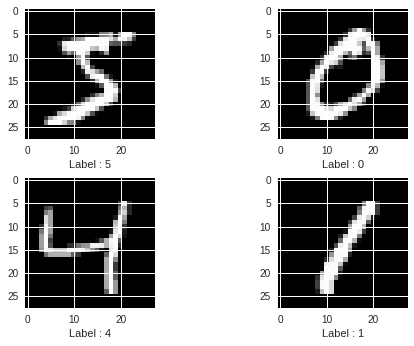

In [54]:
import matplotlib.pyplot as plt

def plot_images(images, labels):
  # Create figure with 2x2 sub-plots.
  fig, axes = plt.subplots(2, 2)
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  # plot 4 images
  for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(images[i].reshape([28,28]), cmap=plt.get_cmap('gray'))
    
    # Plot label
    for idx, val in enumerate(labels[i]):
      if(val == 1):
        ax.set_xlabel('Label : %d' % idx)
        
  plt.show()
  
plot_images(X_train[0:4], y_train[0:4])

# Prepare the image data sets

# Training

In [36]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
  
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 247s - loss: 0.2315 - acc: 0.9342 - val_loss: 0.0816 - val_acc: 0.9747
Epoch 2/10
 - 247s - loss: 0.0737 - acc: 0.9783 - val_loss: 0.0472 - val_acc: 0.9842
Epoch 3/10
 - 247s - loss: 0.0530 - acc: 0.9837 - val_loss: 0.0429 - val_acc: 0.9859
Epoch 4/10
 - 245s - loss: 0.0402 - acc: 0.9875 - val_loss: 0.0404 - val_acc: 0.9866
Epoch 5/10
 - 245s - loss: 0.0335 - acc: 0.9895 - val_loss: 0.0338 - val_acc: 0.9887
Epoch 6/10
 - 246s - loss: 0.0275 - acc: 0.9914 - val_loss: 0.0302 - val_acc: 0.9895
Epoch 7/10
 - 245s - loss: 0.0231 - acc: 0.9929 - val_loss: 0.0346 - val_acc: 0.9881
Epoch 8/10
 - 245s - loss: 0.0207 - acc: 0.9935 - val_loss: 0.0327 - val_acc: 0.9882
Epoch 9/10
 - 245s - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0303 - val_acc: 0.9894
Epoch 10/10
 - 245s - loss: 0.0141 - acc: 0.9959 - val_loss: 0.0313 - val_acc: 0.9903


# Evaluate

In [57]:
# Evaluate the model against the test dataset
result = model.evaluate(x=X_test, y=y_test)

for name, value in zip(model.metrics_names, result):
    print(name, value)

10000/10000 [==============================] - 24s 2ms/step
loss 0.031335036000655965
acc 0.9903
Baseline Error: 0.97%


# Save model to disk

In [0]:
!mkdir Models
!mkdir ModelJS

In [0]:
!ls -la

In [40]:
# Save Python model
model.save('Models/model.h5',overwrite=True)
print("Saved model to disk")

Saved model to disk


# Export the model
to json file that we can later use as an API

In [0]:
!pip3 install tensorflowjs

In [42]:
!tensorflowjs_converter --input_format=keras Models/model.h5 ModelJS/

Using TensorFlow backend.


In [43]:
import os
from google.colab import files

folder = 'ModelJS/'

for filename in os.listdir(folder):
  files.download('%s%s' % (folder,filename)) 
  print("download: %s%s" % (folder,filename))

download: ModelJS/group1-shard1of1
download: ModelJS/model.json
